In [35]:
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.metrics import accuracy_score

df = pd.read_csv("data.csv")
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)
df


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
normalize_numeric_minmax(df, 'CGPA')
normalize_numeric_minmax(df, 'Chance of Admit ')
X = df[['CGPA']]
y = df[['Chance of Admit ']] 

In [38]:
X

,CGPA
0,0.913462
1,0.663462
2,0.384615
3,0.599359
4,0.451923
...,...
495,0.711538
496,0.983974
497,0.884615
498,0.522436


In [39]:
y

,Chance of Admit
0,0.920635
1,0.666667
2,0.603175
3,0.730159
4,0.492063
...,...
495,0.841270
496,0.984127
497,0.936508
498,0.619048


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [41]:
len(X_train)

400

In [42]:
len(X_test)

100

In [43]:
X_train

,CGPA
305,0.641026
107,0.852564
350,0.471154
334,0.592949
142,0.846154
...,...
320,0.544872
15,0.480769
484,0.349359
125,0.596154


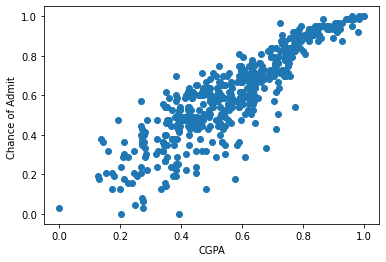

In [44]:
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit ')
plt.scatter(df['CGPA'], df['Chance of Admit '])


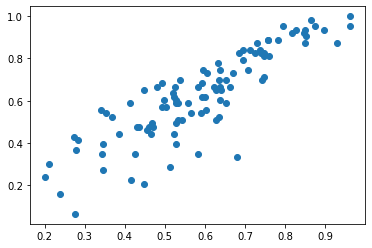

In [45]:
from sklearn import linear_model
plt.scatter(X_test, y_test)

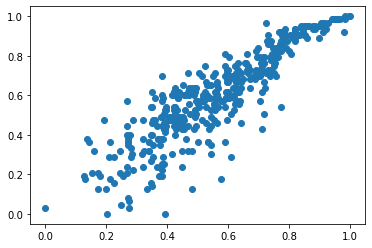

In [46]:
plt.scatter(X_train, y_train)

Root mean squared error = 0.1042
R-squared = 0.7506


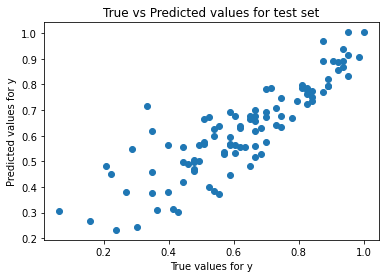

In [47]:
regr = linear_model.LinearRegression() #create linear regression obj
regr.fit(X_train, y_train) #train our data
y_pred = regr.predict(X_test) #predicting future y values from x values of test set
plt.scatter(y_test, y_pred)
plt.title('True vs Predicted values for test set') #predicted y values are consistent with current y values of test set
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

Slope =  1.0156724
Intercept =  0.027138114


Text(0, 0.5, 'y')

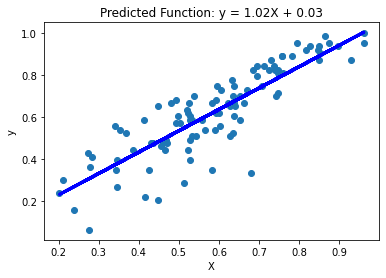

In [48]:
# Display model parameters
print('Slope = ', regr.coef_[0][0])
print('Intercept = ', regr.intercept_[0])### Step 4: Postprocessing

# Plot outputs
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_[0])
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')

Root mean squared error = 0.1056
R-squared = 0.7839


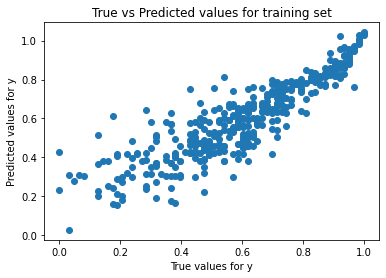

In [49]:
y_pred = regr.predict(X_train) #predict y values based on x values of train set
plt.scatter(y_train, y_pred)
plt.title('True vs Predicted values for training set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train, y_pred)))
print('R-squared = %.4f' % r2_score(y_train, y_pred))

Root mean squared error = 0.1041
R-squared = 0.7512


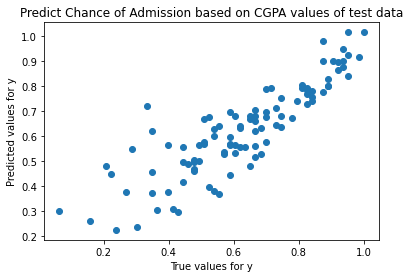

In [50]:
regr.fit(X_test, y_test) # train data based on test data
y_pred = regr.predict(X_test) # predict future y values based on x values of test data
plt.scatter(y_test, y_pred)
plt.title('Predict Chance of Admission based on CGPA values of test data')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

In [51]:
#####multiple linear regression
normalize_numeric_minmax(df, 'GRE Score')
normalize_numeric_minmax(df, 'TOEFL Score')
normalize_numeric_minmax(df, 'University Rating')
normalize_numeric_minmax(df, 'SOP')
normalize_numeric_minmax(df, 'LOR ')
normalize_numeric_minmax(df, 'CGPA')
normalize_numeric_minmax(df, 'Chance of Admit ')
X=df[['GRE Score', 'TOEFL Score','University Rating','SOP', 'LOR ', 'CGPA']].values
y=df[['Chance of Admit ']].values
#X=df[['CGPA']].values
numInstances = 500
numTrain = 400   # number of training instances
numTest = numInstances - numTrain

X_train = X[:-numTest]
X_test = X[-numTest:]
y_train = y[:-numTest]
y_test = y[-numTest:]

In [52]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train) #fit regression model to training data

LinearRegression()

In [53]:
y_pred = regr.predict(X_test) #predict future y value based on x values of test data

Root mean squared error = 0.0697
R-squared = 0.8937


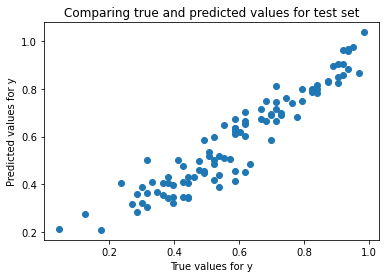

In [54]:
plt.scatter(y_test, y_pred)
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

Root mean squared error = 0.0655
R-squared = 0.9060


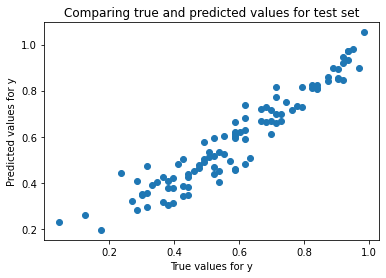

In [55]:
# Fit regression model to the test set
regr.fit(X_test, y_test)

# Apply model to the test set
y_pred = regr.predict(X_test)

# Comparing true versus predicted values
plt.scatter(y_test, y_pred)
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

In [56]:
###Classification###
df = pd.read_csv("data.csv")
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace = True, drop = True)


In [57]:
#There are 9 columns. We want to descretize the last one.
#Replace a range of numbers with a singular number.
df.loc[(df['Chance of Admit '] > 0) & (df['Chance of Admit '] <= 0.33), 'Chance of Admit '] = -1
df.loc[(df['Chance of Admit '] > 0.33) & (df['Chance of Admit '] <= 0.66), 'Chance of Admit '] = -2
df.loc[(df['Chance of Admit '] > 0.66) & (df['Chance of Admit '] <= 1), 'Chance of Admit '] = -3

#Replace those new numbers with words instead so it is easier to understand.
df['Chance of Admit '] = df['Chance of Admit '].replace([-1],'Unlikely')
df['Chance of Admit '] = df['Chance of Admit '].replace([-2],'Somewhat Likely')
df['Chance of Admit '] = df['Chance of Admit '].replace([-3],'Highly Likely')
df

#df2['Chance of Admit '].mask(df2['Chance of Admit ']<.70, 'Not Admitted', inplace = True)
#df2['Chance of Admit '].mask((df2['Chance of Admit '] > .70 & df['Chance of Admit ']), 'Likely Admitted', inplace = True)
#df2['Chance of Admit '].mask(df2['Chance of Admit ']>.90, 'Admitted', inplace = True)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,181,300,104,3,3.5,3.0,8.16,0,Highly Likely
1,278,320,101,2,2.5,3.0,8.62,0,Highly Likely
2,126,300,100,3,2.0,3.0,8.66,1,Somewhat Likely
3,145,325,112,2,3.0,3.5,8.96,1,Highly Likely
4,427,312,106,3,3.0,5.0,8.57,0,Highly Likely
...,...,...,...,...,...,...,...,...,...
495,446,328,116,5,4.5,5.0,9.08,1,Highly Likely
496,239,310,104,3,2.0,3.5,8.37,0,Highly Likely
497,175,321,111,4,4.0,4.0,8.97,1,Highly Likely
498,270,308,108,4,4.5,5.0,8.34,0,Highly Likely


In [58]:
#Setup the training and testing data.
numInstances = 500
numTrain = 100
numTest = numInstances - numTrain

#Create the training and testing datasets.
trainingData = df[:numTest]
testData = df[numTest:]

#Output for our function should be the last column.
Y = pd.DataFrame(trainingData, columns = ['Chance of Admit '])

#The inputs for the function should be the other colomns minus serial no.
X = trainingData.drop(['Chance of Admit ', 'Serial No.'], axis = 1)

#Create Classification Tree.
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf  = clf.fit(X,Y)

X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,300,104,3,3.5,3.0,8.16,0
1,320,101,2,2.5,3.0,8.62,0
2,300,100,3,2.0,3.0,8.66,1
3,325,112,2,3.0,3.5,8.96,1
4,312,106,3,3.0,5.0,8.57,0
...,...,...,...,...,...,...,...
395,324,105,3,3.0,4.0,8.75,0
396,314,103,2,2.0,3.0,8.21,0
397,304,102,2,3.0,4.0,8.73,0
398,298,99,1,1.5,3.0,7.46,0


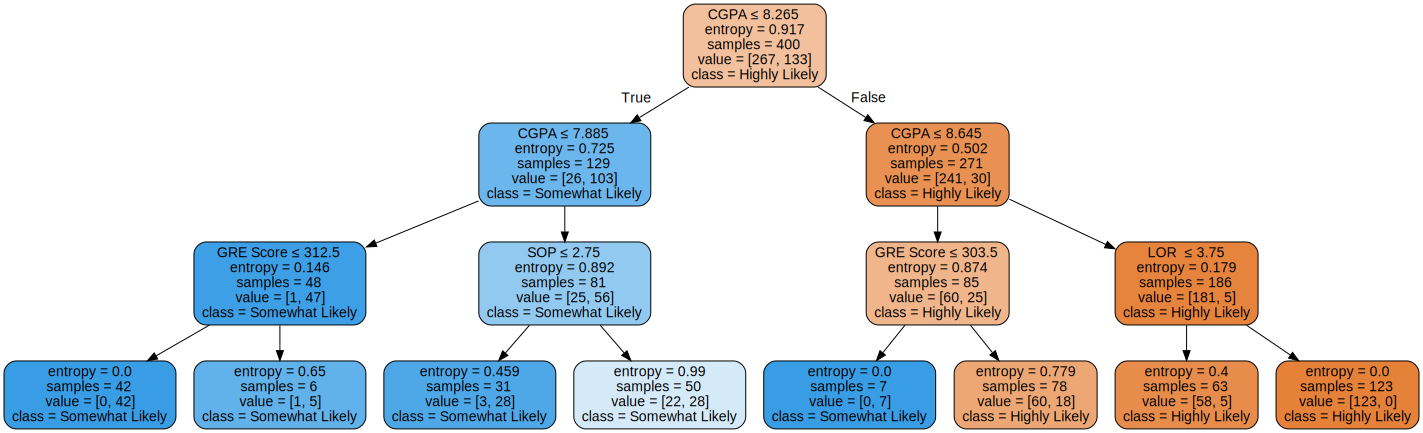

In [59]:
import graphviz

#Create the data for the graph
dot_data = tree.export_graphviz(clf, out_file = None)
graph = graphviz.Source(dot_data)
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = X.columns, class_names = ['Highly Likely', 'Somewhat Likely', 'Unlikely'],
                               filled = True, rounded = True, special_characters = True)
#Create the graph to display the data.
graph = graphviz.Source(dot_data)
graph

In [62]:
#Create a seperate Test set for x and y
testY = pd.DataFrame(testData, columns = ['Chance of Admit '])
testX = testData.drop(['Chance of Admit ', 'Serial No.'], axis = 1)

#Predict the value of Y 
predictY = clf.predict(testX)

#Combine the test data values with the predicted values of chance of admission.
testData.reset_index(inplace = True, drop = True)
predictions = pd.concat([testData['Chance of Admit '], pd.Series(predictY, name = 'Predicted Class')], axis = 1)
predictions

,Chance of Admit,Predicted Class
0,Somewhat Likely,Somewhat Likely
1,Highly Likely,Highly Likely
2,Highly Likely,Highly Likely
3,Highly Likely,Somewhat Likely
4,Somewhat Likely,Somewhat Likely
...,...,...
95,Highly Likely,Highly Likely
96,Highly Likely,Highly Likely
97,Highly Likely,Highly Likely
98,Highly Likely,Highly Likely


In [65]:
#Print the accuracy of the predictions.
print('Accuracy = %.2f' % (accuracy_score(testY, predictY)))

Accuracy = 0.82
